In [1]:
!pip install kaggle


In [2]:
import matplotlib.image as mpimg
import os

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow import keras
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from glob import glob
import cv2

import warnings
warnings.filterwarnings('ignore')


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d ahemateja19bec1025/traffic-sign-dataset-classification

traffic-sign-dataset-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
from zipfile import ZipFile
content="/content/traffic-sign-dataset-classification.zip"
with ZipFile(content,'r') as zip:
  zip.extractall()
print("The data from the dataset have been extracted successfully")


The data from the dataset have been extracted successfully


In [6]:
# path to the folder containing our dataset
dataset = '/content/traffic_Data/DATA'

# path of label file
labelfile = pd.read_csv('labels.csv')


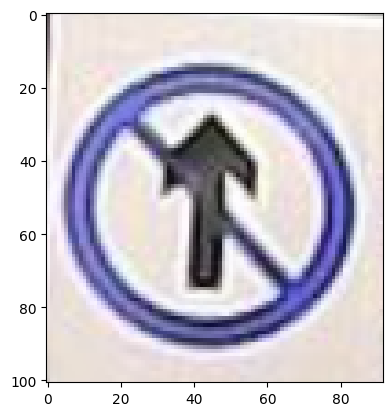

In [7]:
# Visualize some images from the dataset
img = cv2.imread("/content/traffic_Data/DATA/10/010_0011.png")
plt.imshow(img)

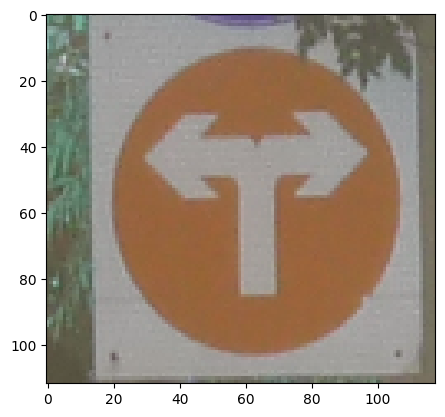

In [8]:

img = cv2.imread("/content/traffic_Data/DATA/23/023_0001.png")
plt.imshow(img)

In [9]:
labelfile.head()

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [10]:

labelfile.tail()

,ClassId,Name
53,53,Give Way
54,54,No stopping
55,55,No entry
56,56,Unknown7
57,57,Unknown8


In [11]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2,
															subset='training',
															image_size=(
																224, 224),
															seed=123,
															batch_size=32)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2,
															subset='validation',
															image_size=(
																224, 224),
															seed=123,
															batch_size=32)


Found 4170 files belonging to 58 classes.
Using 3336 files for training.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [12]:
class_numbers = train_ds.class_names
class_names = []
for i in class_numbers:
	class_names.append(labelfile['Name'][int(i)])


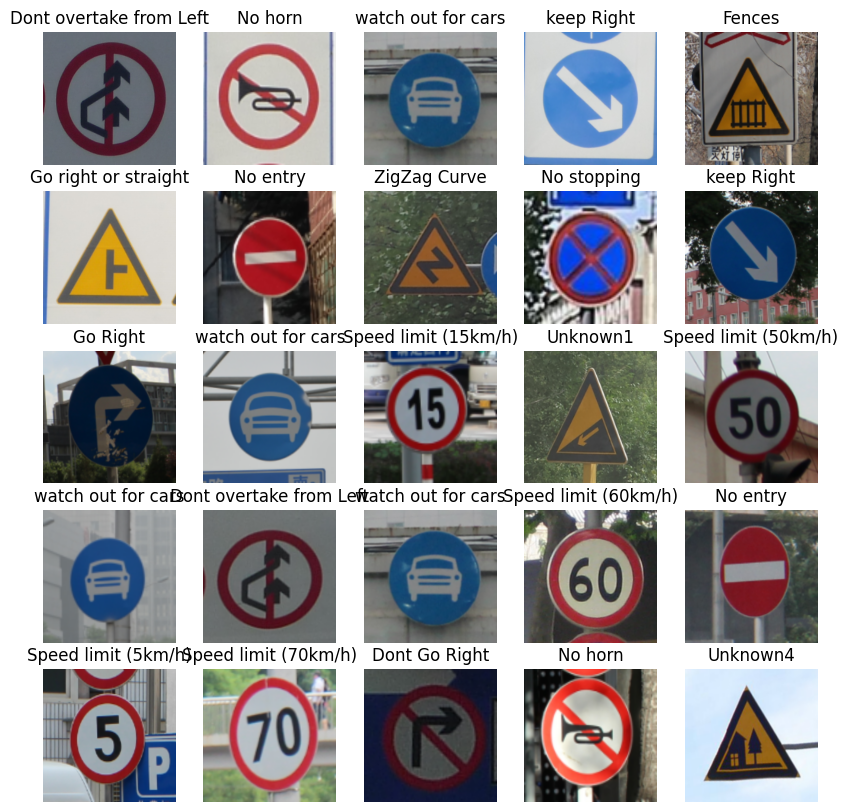

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
	for i in range(25):
		ax = plt.subplot(5, 5, i + 1)
		plt.imshow(images[i].numpy().astype("uint8"))
		plt.title(class_names[labels[i]])
		plt.axis("off")

plt.show()


In [14]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip(
            "horizontal", input_shape=(224, 224, 3)),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
        tf.keras.layers.experimental.preprocessing.RandomFlip(
            mode="horizontal_and_vertical")
    ]
)

In [15]:
model = Sequential()
model.add(data_augmentation)
model.add(Rescaling(1./255))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(labelfile), activation='softmax'))


In [16]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
			optimizer='adam',
			metrics=['accuracy'])


In [17]:
# Set callback functions to early stop training
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]
history = model.fit(train_ds,
				validation_data=val_ds,
				epochs=5,
				callbacks=mycallbacks)


Epoch 1/5
105/105 [==============================] - 29s 139ms/step - loss: 3.4428 - accuracy: 0.1349 - val_loss: 2.8597 - val_accuracy: 0.2518
Epoch 2/5
105/105 [==============================] - 14s 125ms/step - loss: 2.5737 - accuracy: 0.2806 - val_loss: 2.1418 - val_accuracy: 0.3513
Epoch 3/5
105/105 [==============================] - 14s 129ms/step - loss: 2.0789 - accuracy: 0.3627 - val_loss: 1.7335 - val_accuracy: 0.4257
Epoch 4/5
105/105 [==============================] - 14s 131ms/step - loss: 1.8225 - accuracy: 0.4335 - val_loss: 1.5442 - val_accuracy: 0.5252
Epoch 5/5
105/105 [==============================] - 14s 129ms/step - loss: 1.5905 - accuracy: 0.4781 - val_loss: 1.2517 - val_accuracy: 0.5959


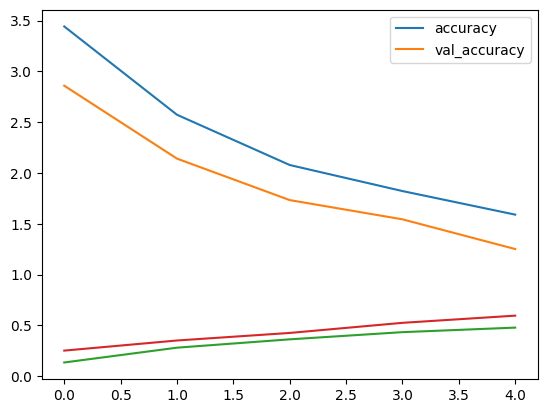

In [18]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper right')

# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], loc='upper right')
